# Lab2
## Task1
First, we have to import the data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns


In [63]:
# get both sheets from the provided ods file
sheet4 = pd.read_excel('data/ua2020_source.ods', 'Sheet4')
pivot_table_sheet4_1 = pd.read_excel('data/ua2020_source.ods', 'Pivot Table_Sheet4_1')

pivot_table_sheet4_1.head()

,Sum - val,Unnamed: 1,Data,index_abbr,index_name,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165
0,NaN,NaN,AHP,NaN,AIDS,NaN,AIR201,NaN,BN,NaN,...,NaN,WSU171,NaN,WSU172,NaN,WTP171,NaN,WTP172,NaN,Total Result
1,NaN,NaN,Рівень забезпеченості житлом,NaN,Чисельність ВІЛ-інфікованих,NaN,Комплексний індекс забруднення атмосфери усере...,NaN,Безробітне населення,NaN,...,NaN,Утилізування і перероблення відходів I-III кл...,NaN,Утилізування і перероблення відходів IV класу...,NaN,Частка забирання прісної води із природних вод...,NaN,Скидання забруднених зворотних вод у поверхнев...,NaN,NaN
2,region_name,region_abbr,2017,2018.000000,2017,2018.000,2017,2018.0,2017,2018.0,...,2018.000,2017,2018.0,2017,2018.00000,2017,2018.000,2017,2018.000,NaN
3,АР Крим,UA.KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.74
4,Вінницька,UA.VI,30.3818,0.030463,0.323,0.215,4.53,4.8,10.7,9.9,...,95.297,0,0.0,1.31522,3.14984,4.666,4.674,2.299,2.299,2071521.845493


In [64]:
regions = pivot_table_sheet4_1.iloc[3:-1, 0]
column_names = pivot_table_sheet4_1.iloc[1, 2:]
print(regions)
data = pivot_table_sheet4_1.iloc[3:-1, 2:-1]
min_max_scaler = MinMaxScaler()
scaled_data_np = min_max_scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data_np)
print(scaled_data.shape)

3               АР Крим
4             Вінницька
5             Волинська
6      Дніпропетровська
7              Донецька
8           Житомирська
9          Закарпатська
10           Запорізька
11    Івано-Франківська
12                 Київ
13             Київська
14       Кіровоградська
15            Луганська
16            Львівська
17         Миколаївська
18              Одеська
19           Полтавська
20           Рівненська
21          Севастополь
22              Сумська
23        Тернопільська
24           Харківська
25           Херсонська
26          Хмельницька
27            Черкаська
28          Чернівецька
29         Чернігівська
Name: Sum - val, dtype: object
(27, 163)


In [65]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,162
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218085,0.218085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.804778,0.784352,0.066189,0.128231,0.151277,0.173578,0.438095,0.469388,0.057751,0.057751,...,0.129670,0.129676,0.000000,0.000000,0.001818,0.004387,0.011413,0.006463,0.000534,0.000428
2,0.549076,0.544356,0.048997,0.162028,0.618861,0.713597,0.609524,0.622449,0.470365,0.470365,...,0.160716,0.160716,0.000122,0.000245,0.000595,0.000853,0.007020,0.003810,0.000000,0.000111
3,0.569013,0.544858,1.000000,0.978131,0.905697,1.000000,0.228571,0.275510,0.009119,0.009119,...,0.031865,0.031865,0.326815,0.277288,1.000000,1.000000,0.253613,0.164189,0.034351,0.034968
4,0.134672,0.129545,0.395989,0.293241,1.000000,0.975892,0.809524,0.887755,0.183891,0.183891,...,0.061324,0.054033,1.000000,0.783653,0.043229,0.061199,0.320278,0.231181,0.156600,0.146060


Finally, we can draw graphs of these indicators: the number of HIV-infected, unemployed population, the total number
of victims of crime, Internet subscribers, environmental pollution and the average monthly salary.

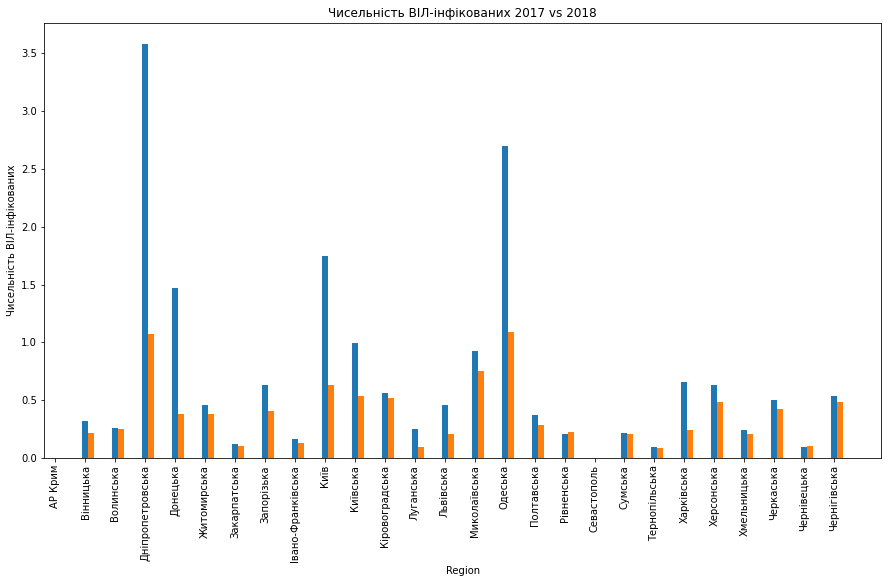

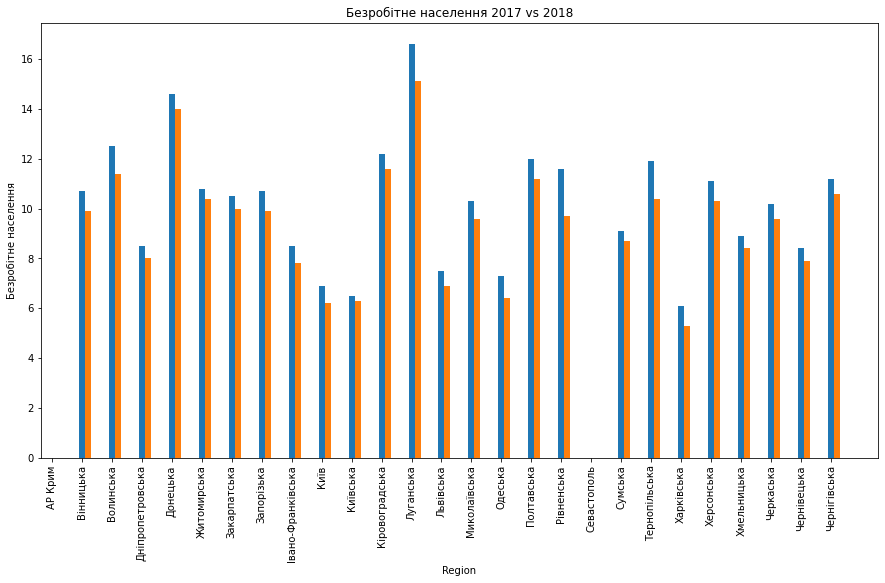

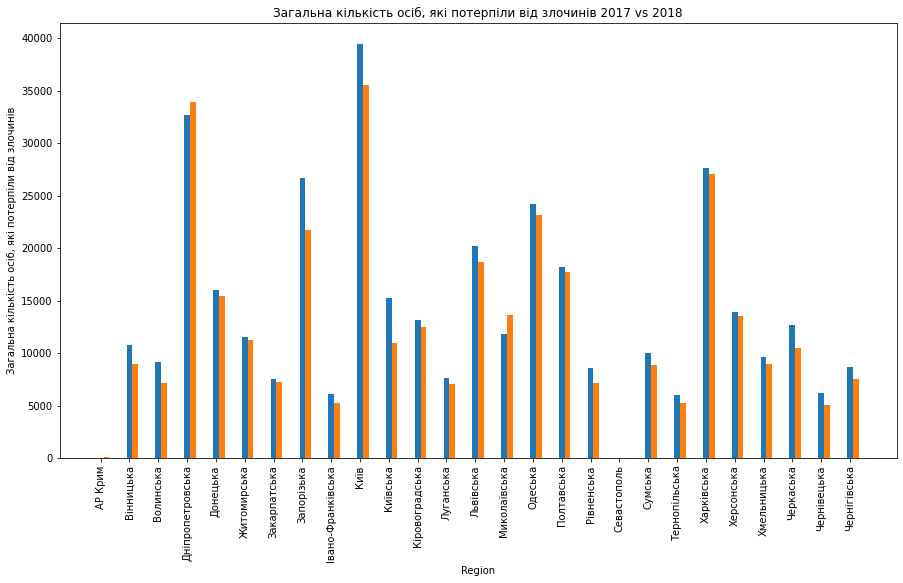

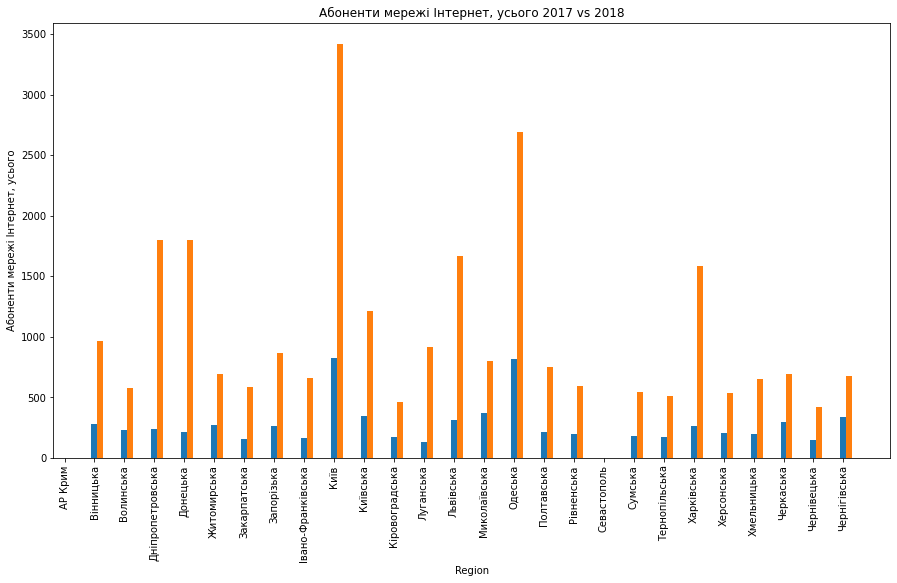

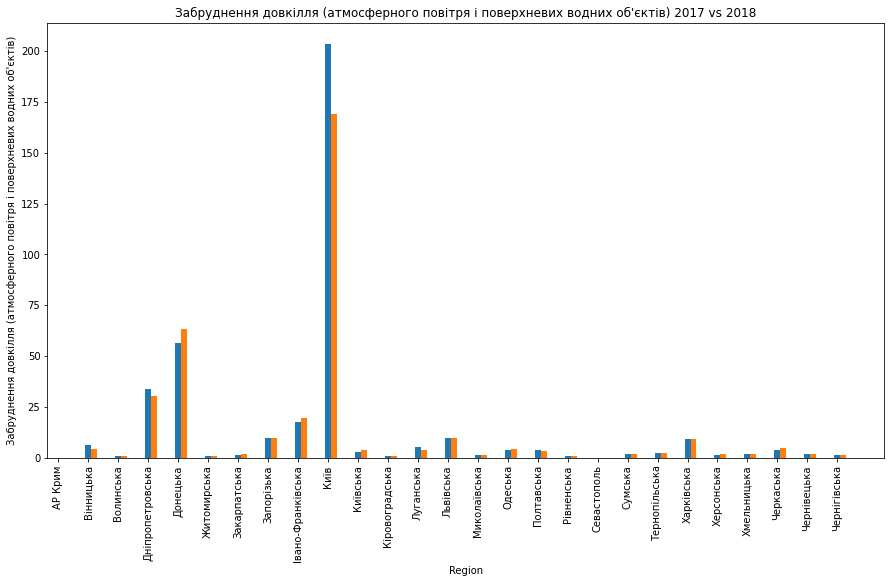

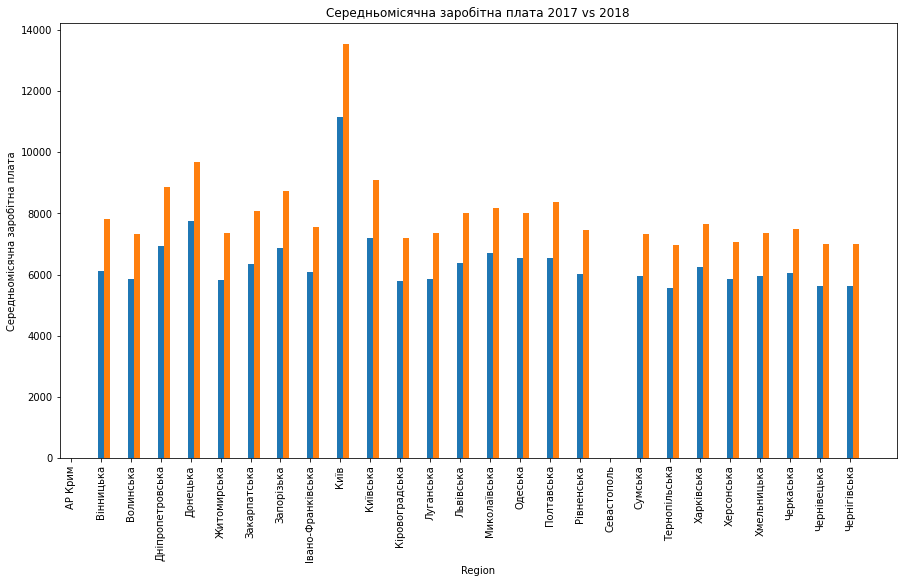

In [66]:
def draw_comparison_graph(data, regions, column_names, col_idx):
    col_2017 = data.iloc[:, col_idx]
    col_2018 = data.iloc[:, col_idx + 1]
    indicator_name = column_names[col_idx]
    indices = np.arange(len(col_2017))
    width = 0.20
    fig = plt.figure()
    fig.set_figwidth(15)
    fig.set_figheight(8)
    plt.bar(indices, col_2017, width=width)
    plt.bar(indices + width, col_2018, width=width)
    plt.xticks(ticks=indices, labels=regions, rotation=90)

    plt.xlabel('Region')
    plt.ylabel(indicator_name)
    plt.title(f'{indicator_name} 2017 vs 2018')
    plt.show()


indices_to_graph = [2, 6, 18, 53, 116, 135]
for idx in indices_to_graph:
    draw_comparison_graph(data, regions, column_names, idx)

Show how these indicators correlate

In [67]:
corr_labels = []
corr_columns = np.array([])

for idx in indices_to_graph:
    corr_columns = np.append(corr_columns, [idx, idx + 1])
    corr_labels.append(column_names[idx] + ' 2017')
    corr_labels.append(column_names[idx] + ' 2018')

corr_dict = {}
corr_columns = corr_columns.astype(int).tolist()
corr_labels[8] = 'Забруднення довкілля 2017'
corr_labels[9] = 'Забруднення довкілля 2018'

for key in corr_labels:
    for val in corr_columns:
        corr_dict[key] = data.iloc[:, val].astype('float64')
        corr_columns.remove(val)
        break

corr_data = pd.DataFrame(corr_dict)
corr_data.head()

,Чисельність ВІЛ-інфікованих 2017,Чисельність ВІЛ-інфікованих 2018,Безробітне населення 2017,Безробітне населення 2018,"Загальна кількість осіб, які потерпіли від злочинів 2017","Загальна кількість осіб, які потерпіли від злочинів 2018","Абоненти мережі Інтернет, усього 2017","Абоненти мережі Інтернет, усього 2018",Забруднення довкілля 2017,Забруднення довкілля 2018,Середньомісячна заробітна плата 2017,Середньомісячна заробітна плата 2018
3,NaN,NaN,NaN,NaN,27.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.323,0.215,10.7,9.9,10800.0,8915.0,281.155950,968.2,6.465,4.305,6121.16,7801.0
5,0.263,0.249,12.5,11.4,9132.0,7193.0,233.476126,576.3,1.183,1.154,5849.14,7324.0
6,3.582,1.070,8.5,8.0,32711.0,33885.0,236.898322,1796.5,33.790,30.528,6938.53,8862.0
7,1.474,0.381,14.6,14.0,16032.0,15466.0,211.281000,1800.4,56.650,63.369,7763.90,9686.0


<AxesSubplot:>

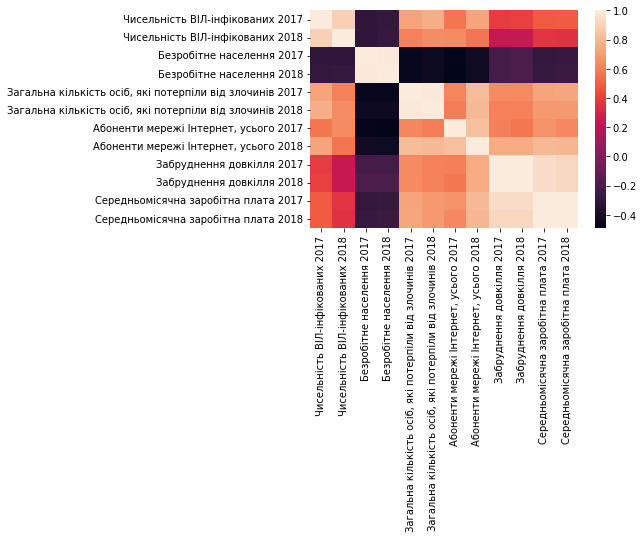

In [68]:
sns.heatmap(corr_data.corr())

## Task2

In [69]:
# some helper functions
def NVL(series, value):
    return series.fillna(value)


def normalize_series(series):
    std_scaler = MinMaxScaler()
    transformed_data = series.to_numpy().reshape((-1, 1))
    scaled_np_arr = std_scaler.fit_transform(transformed_data)
    return pd.Series(scaled_np_arr.reshape((25,)))


def extract_col(data, col_idx, is_2018):
    col = data.iloc[:, col_idx + is_2018]
    # return col.fillna(col.mean())
    # return NVL(col, col.mean())
    return col


def MAX(series):
    return series.max()


def MIN(series):
    return series.min()


def power(val, p):
    return np.power(val, p)


def reverse_series(series):
    return series[::-1]


def acos(series):
    return np.arccos(series)

In [70]:
def get_SDI_DoH(data, year):
    data = data.drop([0, 18]) if year >= 2014 else data
    data = data.reset_index(drop=True)
    # print(data.iloc[:, 0])
    is_2018 = True if year == 2018 else False

    data = data.fillna(0.5)
    # extract all the important variables from the dataset
    VRP = extract_col(data, 145, is_2018)
    ORPP = extract_col(data, 108, is_2018)
    PSG = extract_col(data, 123, is_2018)
    ORP = extract_col(data, 106, is_2018)
    KAP = extract_col(data, 55, is_2018)
    OORT = extract_col(data, 102, is_2018)
    OET = extract_col(data, 94, is_2018)
    OEP = extract_col(data, 92, is_2018)
    OIT = extract_col(data, 98, is_2018)
    OIP = extract_col(data, 96, is_2018)
    SMZP = extract_col(data, 135, is_2018)
    EAN = extract_col(data, 32, is_2018)
    PPP = extract_col(data, 119, is_2018)
    ONR = extract_col(data, 100, is_2018)
    OVID = extract_col(data, 110, is_2018)
    ORIP = extract_col(data, 104, is_2018)
    KI = extract_col(data, 57, is_2018)
    AIR201_norm = extract_col(data, 4, is_2018)
    LRS201_norm = extract_col(data, 69, is_2018)
    BRS171_norm = extract_col(data, 8, is_2018)
    FFA201_norm = extract_col(data, 40, is_2018)
    FFA202_norm = extract_col(data, 42, is_2018)
    FFA203_norm = extract_col(data, 44, is_2018)
    HZD171_norm = extract_col(data, 49, is_2018)
    WAC171_norm = extract_col(data, 147, is_2018)
    WAC192_norm = extract_col(data, 149, is_2018)
    EMP171 = extract_col(data, 36, is_2018)
    EMP202 = extract_col(data, 38, is_2018)
    WTP171_norm = extract_col(data, 159, is_2018)
    WTP172_norm = extract_col(data, 161, is_2018)
    LNP171_norm = extract_col(data, 65, is_2018)
    LNP192_norm = extract_col(data, 67, is_2018)
    CCM201_norm = extract_col(data, 13, is_2018)
    RWE201_norm = extract_col(data, 127, is_2018)
    RWE202_norm = extract_col(data, 129, is_2018)
    WSU171_norm = extract_col(data, 155, is_2018)
    WSU172_norm = extract_col(data, 157, is_2018)
    AIDS_norm = extract_col(data, 2, is_2018)
    TSR_norm = extract_col(data, 143, is_2018)
    EL_norm = extract_col(data, 34, is_2018)
    LM_norm = extract_col(data, 63, is_2018)
    PATLP_norm = extract_col(data, 114, True)
    PATLSC_norm = extract_col(data, 115, True)
    PATLG_norm = extract_col(data, 112, True)
    PATLLA_norm = extract_col(data, 113, True)
    WPSPA_norm = extract_col(data, 151, is_2018)
    CFL_norm = extract_col(data, 15, True)
    PR_norm = extract_col(data, 121, is_2018)
    MPO_norm = extract_col(data, 84, is_2018)
    SA_norm = extract_col(data, 131, is_2018)
    CaPOTL_norm = extract_col(data, 10, False)
    MmTL_norm = extract_col(data, 74, is_2018)
    IU_norm = extract_col(data, 54, is_2018)
    CS_norm = extract_col(data, 24, is_2018)
    MmINT_norm = extract_col(data, 72, is_2018)
    NRO_norm = extract_col(data, 90, is_2018)
    CTL_norm = extract_col(data, 26, is_2018)
    PPBD_norm = extract_col(data, 118, False)
    SHF_norm = extract_col(data, 133, is_2018)
    AHP_norm = extract_col(data, 0, is_2018)
    NCPU_norm = extract_col(data, 86, is_2018)
    PSPTO_norm = extract_col(data, 125, is_2018)
    CPED_norm = extract_col(data, 20, is_2018)
    DOGCO_norm = extract_col(data, 30, is_2018)
    COV_norm = extract_col(data, 18, is_2018)
    NMBE_norm = extract_col(data, 88, is_2018)
    LS_norm = extract_col(data, 71, True)
    Illw_norm = extract_col(data, 51, is_2018)
    FNADAM_norm = extract_col(data, 46, True)
    GRP_norm = extract_col(data, 47, is_2018)
    BN_norm = extract_col(data, 6, is_2018)
    KPVM_norm = extract_col(data, 59, is_2018)
    DNO_norm = extract_col(data, 28, is_2018)
    WRS19_norm = extract_col(data, 153, is_2018)
    POL19_norm = extract_col(data, 116, is_2018)
    CCH19_norm = extract_col(data, 11, is_2018)
    mortTB_norm_rev = reverse_series(extract_col(data, 82, is_2018))
    mortCANC_norm_rev = reverse_series(extract_col(data, 78, is_2018))
    mortCIRCUL_norm_rev = reverse_series(extract_col(data, 80, is_2018))
    mortAIDS_norm_rev = reverse_series(extract_col(data, 76, is_2018))
    LIFE_EXP_norm = extract_col(data, 61, is_2018)
    CRIME_norm = extract_col(data, 22, is_2018)
    CIR_norm = extract_col(data, 16, is_2018)
    TH_N_PREV2_Y = extract_col(data, 137, is_2018)
    TH_N_PREV1_Y = extract_col(data, 138 if year == 2017 else 140, False)
    TH_N_CURR_Y = extract_col(data, 141, is_2018)

    # calculations
    maxval_vrp = MAX(VRP)
    VNP = 0.333 * NVL(VRP / maxval_vrp, 0.5)
    maxval_orpp = MAX(ORPP)
    maxval_psg = MAX(PSG)
    VSF = 0.056 * NVL(ORPP / maxval_orpp, 0.5) + 0.278 * NVL(PSG / maxval_psg, 0.5)
    maxval_orp = MAX(ORP)
    SP = 0.333 * NVL(ORP / maxval_orp, 0.5)
    Ibp = VNP + VSF + SP
    maxval_kap = MAX(KAP)
    PA = 0.334 * NVL(KAP / maxval_kap, 0.5)
    maxval_oort = MAX(OORT)
    SR = 0.333 * NVL(OORT / maxval_oort, 0.5)
    OETP = OET + OEP
    maxval_oetp = MAX(OETP)
    OITP = OIT + OIP
    maxval_oitp = MAX(OITP)
    ZED = 0.205 * NVL(OETP / maxval_oetp, 0.5) + 0.128 * NVL(OITP / maxval_oitp, 0.5)
    Ipd = PA + SR + ZED
    maxval_smzp = MAX(SMZP)
    ZP = 0.167 * NVL(SMZP / maxval_smzp, 0.5)
    maxval_ean = MAX(EAN)
    minval_ean = MIN(EAN)
    EANA = 0.333 * NVL((1 - (maxval_ean - EAN) / (maxval_ean - minval_ean)), 0.5)
    maxval_ppp = MAX(PPP)
    PRP = 0.5 * NVL(PPP / maxval_ppp, 0.5)
    Irp = ZP + EANA + PRP
    maxval_onr = MAX(ONR)
    maxval_ovid = MAX(OVID)
    ID = 0.145 * NVL(ONR / maxval_onr, 0.5) + 0.105 * NVL(OVID / maxval_ovid, 0.5)
    maxval_orip = MAX(ORIP)
    RIP = 0.25 * NVL(ORIP / maxval_orip, 0.5)
    maxval_ki = MAX(KI)
    KIN = 0.5 * NVL(KI / maxval_ki, 0.5)
    Iiim = ID + RIP + KIN
    Iksp = 0.6 * Ibp + 0.4 * Ipd
    Iikp = 0.3 * Irp + 0.7 * Iiim
    Iec = (Iksp + Iikp) / 2
    AIR17I = AIR201_norm
    LRS17I = LRS201_norm
    BRS17I = BRS171_norm
    NTS20I = 0.4 * FFA201_norm + 0.2 * FFA202_norm + 0.1 * FFA203_norm + 0.3 * HZD171_norm
    WAC17I = (WAC171_norm + WAC192_norm) / 2
    EMP20I = EMP171 + EMP202
    WTP17I = (WTP171_norm + WTP172_norm) / 2
    LNP17I = (LNP171_norm + LNP192_norm) / 2
    CCM17I = CCM201_norm
    RWE17I = (RWE201_norm + RWE202_norm) / 2
    WSU17I = (WSU171_norm + WSU172_norm) / 2
    EST17C = (AIR17I + LRS17I + BRS17I + NTS20I + WAC17I) / 5
    EPR17C = (normalize_series(EMP20I) + WTP17I + LNP17I) / 3
    EMN17C = (CCM17I + RWE17I + WSU17I) / 3
    Ie = (EST17C + EPR17C + EMN17C) / 3
    HLT = (AIDS_norm + TSR_norm) / 2
    Ihd = 3 / 8 * HLT + 3 / 8 * EL_norm + 0.25 * LM_norm
    PCP = (PATLP_norm + PATLSC_norm + PATLG_norm + PATLLA_norm + WPSPA_norm + CFL_norm + PR_norm) / 7
    DCS = (MPO_norm + SA_norm + CaPOTL_norm) / 3
    DIS = (MmTL_norm + IU_norm + CS_norm + MmINT_norm) / 4
    REL = (NRO_norm + CTL_norm) / 2
    IID = 0.35 * PCP + 0.25 * DCS + 0.3 * DIS + 0.1 * REL
    INF = (PPBD_norm + SHF_norm + AHP_norm + NCPU_norm + PSPTO_norm + CPED_norm) / 6
    RS = (DOGCO_norm + COV_norm + NMBE_norm) / 3
    EW = (LS_norm + Illw_norm + FNADAM_norm + GRP_norm) / 4
    Iql = 0.35 * INF + 0.35 * RS + 0.3 * EW
    Is = (Ihd + IID + Iql) / 3
    Cql = power(Ie * Ie + Is * Is + Iec * Iec, 0.5)
    Sec = power(power(BN_norm, 3) + power(KPVM_norm, 3) + power(DNO_norm, 3), 1 / 3)
    Se = (WRS19_norm + POL19_norm + CCH19_norm) / 3
    HEALTH_DEC = 0.2359512471 * mortTB_norm_rev + 0.236311309 * mortCANC_norm_rev + 0.2899148047 * mortCIRCUL_norm_rev + 0.2378226392 * mortAIDS_norm_rev
    CORR_PER = CFL_norm
    CORR_PER_norm = normalize_series(CORR_PER)
    HEALTH_DEC_norm = normalize_series(HEALTH_DEC)
    Ss = power(power(LIFE_EXP_norm, 3) + power(CRIME_norm, 3) + power(CORR_PER_norm, 3) + power(CIR_norm, 3) + power(
        HEALTH_DEC_norm, 3), 1 / 3)
    TH = (TH_N_PREV2_Y + TH_N_PREV1_Y + TH_N_CURR_Y) / 3
    So = normalize_series(TH)
    Csl = power(power(Ss, 3) + power(Sec, 3) + power(Se, 3) + power(So, 3), 1 / 3)
    Isd = power(power(1 / power(12, 1 / 3) * Csl, 2) + Ie * Ie + Is * Is + Iec * Iec, 0.5)
    G = 1 - acos((Iec + Ie + Is) / (power(3.0, 0.5) * power(Iec * Iec + Ie * Ie + Is * Is, 0.5))) / acos(
        1 / power(3, 0.5))
    return Isd, G, Cql, Csl


Isd2017, G2017, Cql2017, Csl2017 = get_SDI_DoH(scaled_data, 2017)
Isd2018, G2018, Cql2018, Csl2018 = get_SDI_DoH(scaled_data, 2018)

isd_g_2017 = {'year': 2017, 'Isd(Q)': Isd2017, 'G': G2017}
isd_g_2018 = {'year': 2018, 'Isd(Q)': Isd2018, 'G': G2018}

regions = regions.reset_index(drop=True)
isd_g_regions = regions.drop([0, 18])
isd_g_regions = isd_g_regions.reset_index(drop=True)
for isd_g in (isd_g_2017, isd_g_2018):
    isd_g['region_name'] = isd_g_regions

isd_g_2017_df = pd.DataFrame(isd_g_2017)
isd_g_2018_df = pd.DataFrame(isd_g_2018)

isd_g_2017_df.to_excel('data/isd_g_2017.xlsx', index=False)
isd_g_2018_df.to_excel('data/isd_g_2018.xlsx', index=False)

## Task3

Clustering of regions of Ukraine on this indicator into five clusters (Highest level of sustainable
development, High level of sustainable development, Average level of sustainable development,
Level of sustainable development below average, Low level of sustainable development) for 2017
and 2018

In [71]:
def clusterize_data(Isd, col_name, cat_col_name):
    kmeans = KMeans(n_clusters=5, random_state=0).fit(Isd.to_numpy().reshape((-1, 1)))
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_.reshape((1, -1))
    actual_labels = ['Highest', 'High', 'Average', 'Below Average', 'Low']
    actual_labels.reverse()
    u_labels = np.unique(labels)
    u_labels = u_labels[np.argsort(centers)].reshape((5,))
    s = pd.Series(np.ndarray((25,)))
    for i in range(len(u_labels)):
        s[labels == u_labels[i]] = actual_labels[i]
    clusters = {'region_name': isd_g_regions}
    cluster_df = pd.DataFrame(clusters)
    cluster_df[col_name] = pd.Categorical(s)
    cluster_df[cat_col_name] = cluster_df[col_name].cat.codes
    return cluster_df


tocluster_2017 = (Isd2017, Cql2017, G2017, Csl2017)
tocluster_2018 = (Isd2018, Cql2018, G2018, Csl2018)

clusters = []

for (Isd, Cql, G, Csl) in (tocluster_2017, tocluster_2018):
    print('-----------------------------------')
    cluster_df = clusterize_data(Isd, 'Level of sustainable development', 'isd_lvl')
    cluster_df['Q'] = Isd
    cluster_df['G'] = G
    cluster_df['Cql'] = Cql
    cluster_df['Csl'] = Csl
    cluster_df = cluster_df.sort_values('Q', ascending=False)
    cluster_df = cluster_df.reset_index(drop=True)
    clusters.append(cluster_df)
    print(cluster_df)

-----------------------------------
          region_name Level of sustainable development  isd_lvl         Q  \
0                Київ                          Highest        3  1.387658   
1    Дніпропетровська                             High        2  0.934647   
2            Донецька                             High        2  0.917698   
3             Одеська                          Average        0  0.822218   
4          Запорізька                          Average        0  0.765296   
5           Львівська                          Average        0  0.755737   
6       Тернопільська                          Average        0  0.727416   
7          Харківська                          Average        0  0.721183   
8           Черкаська                          Average        0  0.719747   
9            Київська                          Average        0  0.709834   
10  Івано-Франківська                          Average        0  0.706179   
11         Полтавська                   

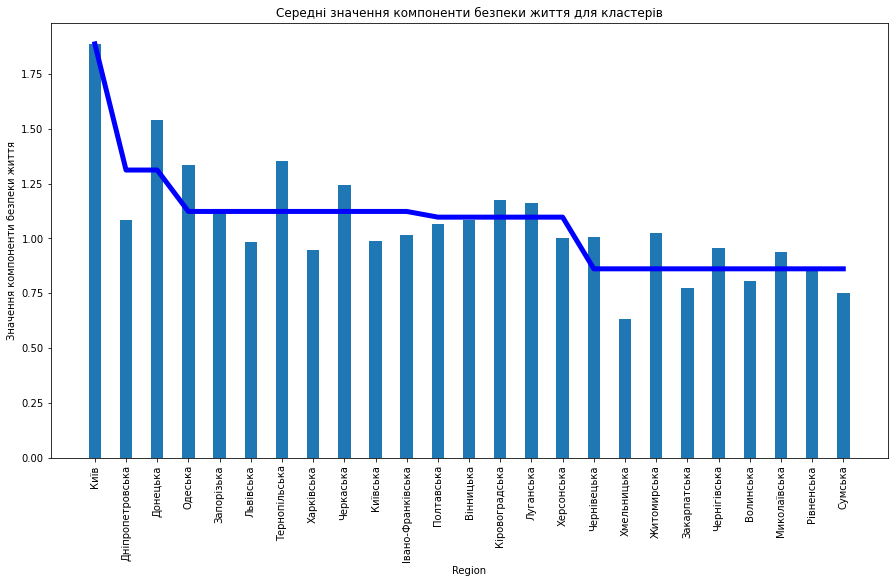

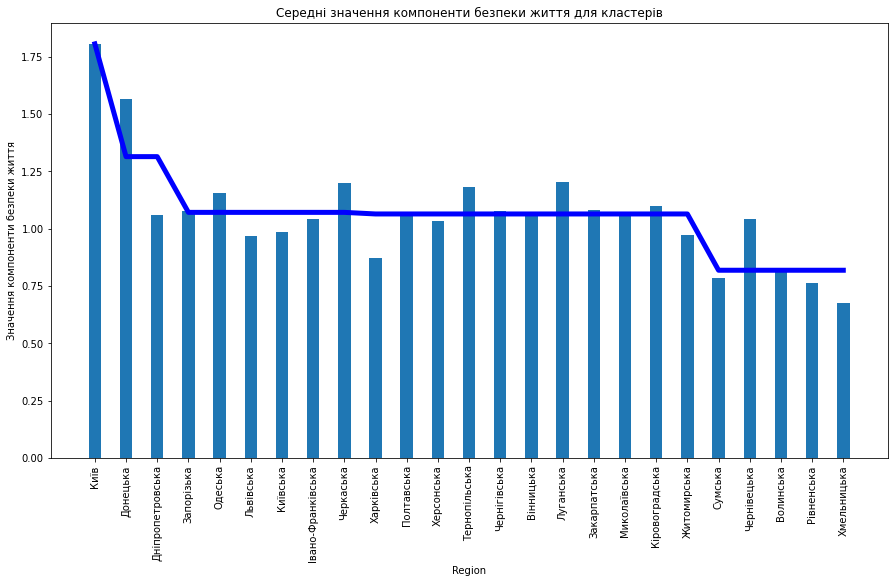

In [72]:
def draw_mean_csl(csl_df, avg_csl, isd_levels):
    indices = np.arange(len(csl_df['Csl']))
    width = 0.40
    fig, ax = plt.subplots()
    mean_y = [avg_csl[0 if i == 3 else 1 if i == 2 else 2 if i == 0 else 3 if i == 1 else 4] for i in isd_levels]
    ax.plot(indices, mean_y, color='blue', linewidth=5)
    fig.set_figwidth(15)
    fig.set_figheight(8)
    plt.bar(indices, csl_df['Csl'], width=width)
    plt.xticks(ticks=indices, labels=csl_df['region_name'], rotation=90)
    plt.xlabel('Region')
    plt.ylabel('Значення компоненти безпеки життя')
    plt.title('Середні значення компоненти безпеки життя для кластерів')
    plt.show()


for i in range(2):
    cluster_df = clusters[i]
    isd_cat = np.array([3, 2, 0, 1, 4])
    avg_csl_per_cluster = []
    for i in isd_cat:
        avg_csl_per_cluster.append(cluster_df[i == cluster_df['isd_lvl']]['Csl'].mean())
    csl_df = pd.DataFrame({'region_name': cluster_df['region_name'], 'Csl': cluster_df['Csl']})
    isd_levels = cluster_df['isd_lvl']
    draw_mean_csl(csl_df, avg_csl_per_cluster, isd_levels)

Дивлячись на отримані результати, можна помітити, що регіони з розвинутою металургічною промисловістю знаходяться вище за рейтингами ніж інші. Київ, як столиця, звісно ж має найбільш сприятливий рівень життя загалом.

In [82]:
for Csl in (Csl2017, Csl2018):
    cluster_df = clusterize_data(Csl, 'Компонента безпеки життя', 'csl_lvl')
    argsort = np.argsort(Csl)[::-1]
    cluster_df = pd.DataFrame(cluster_df.to_numpy()[argsort])
    cluster_df = cluster_df.rename(columns={0: 'Region', 1: 'Компонента безпеки життя', 2: 'csl_lvl'})
    print(cluster_df)
    print()

               Region Компонента безпеки життя csl_lvl
0                Київ                  Highest       3
1            Донецька                     High       2
2       Тернопільська                     High       2
3             Одеська                     High       2
4           Черкаська                  Average       0
5      Кіровоградська                  Average       0
6           Луганська                  Average       0
7          Запорізька                  Average       0
8    Дніпропетровська                  Average       0
9           Вінницька                  Average       0
10         Полтавська                  Average       0
11        Житомирська            Below Average       1
12  Івано-Франківська            Below Average       1
13        Чернівецька            Below Average       1
14         Херсонська            Below Average       1
15           Київська            Below Average       1
16          Львівська            Below Average       1
17       Ч

З отриманих результатів видно, що значення безпеки життя тісно пов'язане зі сталим розвитком

## Task4